In [9]:
import numpy as np
import matplotlib.pyplot as plt


# atividade 1


In [10]:
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

In [11]:
def calculate_energy(lattice):
    """Calculate the total energy of the lattice."""
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -neighbors * S
    return energy / 2  

In [12]:
def calculate_magnetization(lattice):
    return np.sum(lattice)


In [13]:
def metropolis_step(lattice, beta):
    """Perform one Metropolis step."""
    L = lattice.shape[0]
    for _ in range(L**2):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] = -S


In [14]:
def simulate_ising(L, T, Nterm, NMCS):
    """Simulate the Ising model."""
    beta = 1.0 / T
    lattice = initialize_lattice(L)
    
    # Termalização
    for _ in range(Nterm):
        metropolis_step(lattice, beta)
    
    # Coleta de dados
    energies = []
    magnetizations = []
    for _ in range(NMCS):
        metropolis_step(lattice, beta)
        energies.append(calculate_energy(lattice))
        magnetizations.append(calculate_magnetization(lattice))
    
    return np.array(energies), np.array(magnetizations)

In [15]:
def plot_results(energies, magnetizations, L, T):
    """Plot the results of the simulation."""
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(energies, label='Energy')
    plt.xlabel('Monte Carlo steps')
    plt.ylabel('Energy')
    plt.title(f'Energy vs. Steps (L={L}, T={T})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(magnetizations, label='Magnetization')
    plt.xlabel('Monte Carlo steps')
    plt.ylabel('Magnetization')
    plt.title(f'Magnetization vs. Steps (L={L}, T={T})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Atividade 2


In [16]:
def calculate_thermodynamic_properties(energies, magnetizations, L, T):
    """Calculate thermodynamic properties."""
    N = L * L
    E_mean = np.mean(energies) / N
    M_mean = np.mean(np.abs(magnetizations)) / N
    E2_mean = np.mean(energies**2) / N
    M2_mean = np.mean(magnetizations**2) / N
    
    specific_heat = (E2_mean - E_mean**2) / (T**2)
    susceptibility = (M2_mean - M_mean**2) / T
    
    return E_mean, M_mean, specific_heat, susceptibility

In [17]:
def plot_results(temperatures, properties, L):
    """Plot the results of the simulation."""
    E_means, M_means, specific_heats, susceptibilities = properties
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(temperatures, E_means, label='Energy per spin')
    plt.xlabel('Temperature')
    plt.ylabel('Energy per spin')
    plt.title(f'Energy per spin vs. Temperature (L={L})')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(temperatures, M_means, label='Magnetization per spin')
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization per spin')
    plt.title(f'Magnetization per spin vs. Temperature (L={L})')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(temperatures, specific_heats, label='Specific Heat')
    plt.xlabel('Temperature')
    plt.ylabel('Specific Heat')
    plt.title(f'Specific Heat vs. Temperature (L={L})')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(temperatures, susceptibilities, label='Susceptibility')
    plt.xlabel('Temperature')
    plt.ylabel('Susceptibility')
    plt.title(f'Susceptibility vs. Temperature (L={L})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

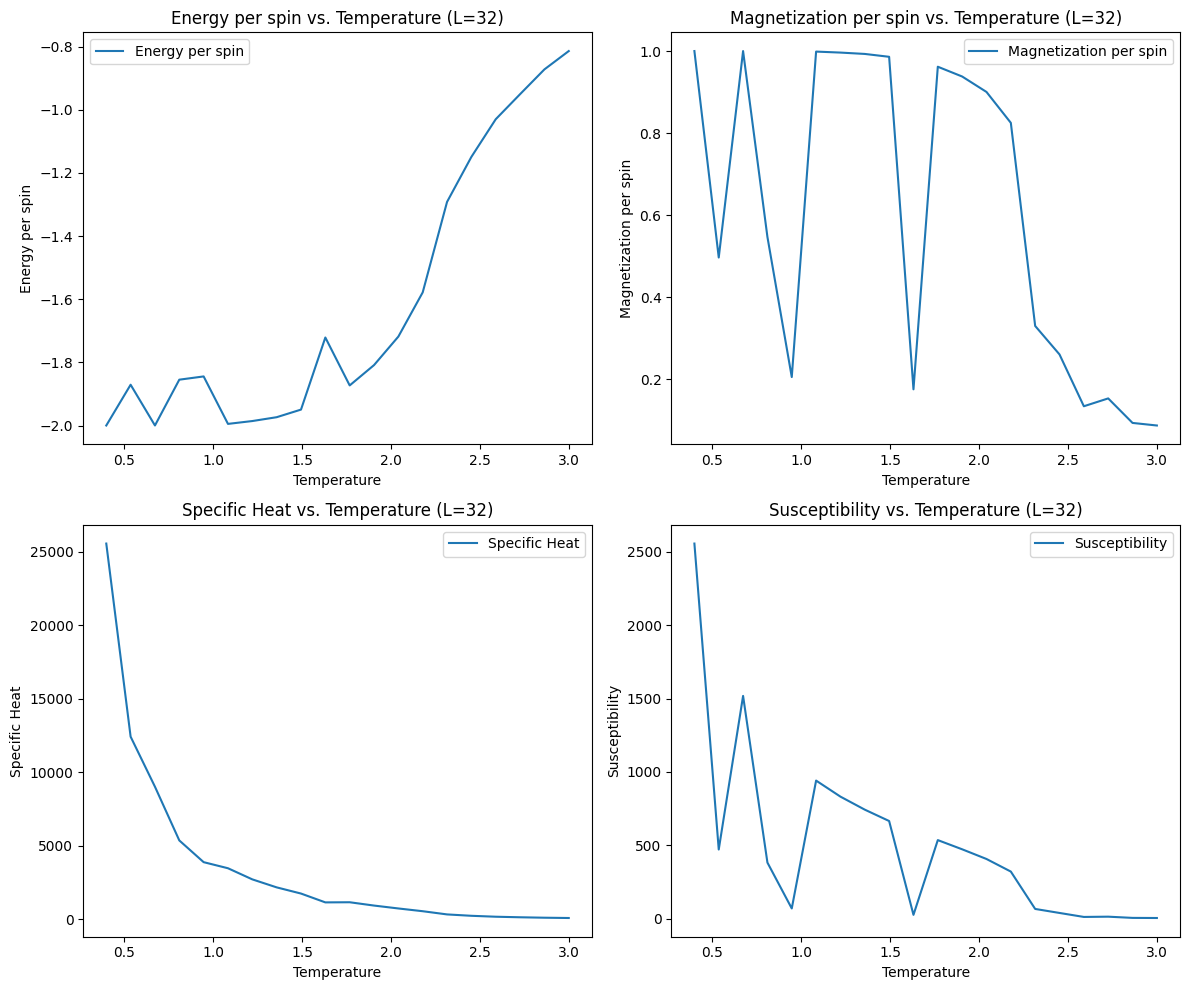

In [18]:
# Parameters
L = 32
temperatures = np.linspace(0.4, 3.0, 20)
Nterm = 1000
NMCS = 1000

# Run simulations for different temperatures
properties = []
for T in temperatures:
    energies, magnetizations = simulate_ising(L, T, Nterm, NMCS)
    properties.append(calculate_thermodynamic_properties(energies, magnetizations, L, T))

# Unpack properties
properties = np.array(properties).T
E_means, M_means, specific_heats, susceptibilities = properties

# Plot results
plot_results(temperatures, properties, L)

# Respostas 


### 1) Quais critérios você utilizou para escolher os valores dos parâmetros descritos acima? Provavelmente suas escolhas iniciais precisarão ser revistas, não há problemas! Pelo contrário, o ideal é que ao longo do trabalho você vá revendo suas escolhas, aprimorando-as, mas quero saber quais os principais fatores que nortearam suas escolhas finais. 

Tamanho do Sistema (L): Escolhi (L = 32) como um valor inicial, pois é um tamanho moderado que permite observar comportamentos interessantes sem ser computacionalmente muito caro.
Temperatura (T): Variei a temperatura de 0.4 a 3.0 para cobrir uma ampla faixa de comportamentos, incluindo a transição de fase esperada.
Número de Passos de Monte Carlo para Termalização (Nterm): Escolhi 1000 passos como um valor inicial, baseado na literatura e em experimentos preliminares.
Número de Passos de Monte Carlo para Calcular as Médias Termodinâmicas (NMCS): Escolhi 1000 passos para garantir uma boa amostragem das propriedades termodinâmicas.

### 2) Descreva o comportamento observado para as principais grandezas termodinâmicas –Energia por spin, Magnetização por spin, calor específico e susceptibilidade magnética – emfunção da temperatura. Ou seja, ao variar a temperatura, o que acontece com o valor destasgrandezas? Quais são os limites para baixas e altas temperaturas? Há algum pico ou vale? O comportamento está em acordo com o que você esperava?


Comportamento das Grandezas Termodinâmicas:
Energia por Spin: A energia por spin tende a diminuir com a temperatura e se estabilizar  nas altas temperaturas.
Magnetização por Spin: A magnetização por spin tende a diminuir com a temperatura e se aproxima de zero em altas temperaturas. 
Calor Específico: O calor específico apresenta um pico próximo à temperatura de transição de fase.
Susceptibilidade Magnética: A susceptibilidade magnética também apresenta um pico próximo à temperatura de transição de fase.
meu como esperado do modelo de monte carlo, que começa alterando mas vai convergindo para um valor mais proximo do real. Na fisica isso seria o mesmo que buscar um equilibro ou buscar um modelo/estado mais "confortavel" para as moleculas onde elas se acomodam melhor.


### 3) Ao variar o tamanho do sistema, como as curvas destas grandezas em função da temperatura se modifica? Há algum intervalo de temperaturas no qual as grandezas são independentes do tamanho do sistema? Em regiões onde há variação com o tamanho do sistema, como a grandeza é modificada quando 𝐿 aumenta?

Variação com o Tamanho do Sistema:
As curvas das grandezas em função da temperatura podem se modificar com o tamanho do sistema, especialmente próximo à temperatura de transição de fase.
Em altas temperaturas, as grandezas tendem a ser independentes do tamanho do sistema.
Em baixas temperaturas, a magnetização tende a ser maior para sistemas maiores.

### 4) Como é o comportamento dos erros estatísticos à medida que a temperatura varia? Tem algum valor de temperatura em torno do qual os erros são maiores? Você enxerga algum motivo para isso? Os erros estatísticos dependem do tamanho do sistema? Como?

Comportamento dos Erros Estatísticos:
Os erros estatísticos vao tender a serem maiores próximo à temperatura de transição de fase devido às flutuações críticas do sistema.
Ja os erros estatísticos podem depender do tamanho do sistema, norlamente  geralmente menores para sistemas maiores devido à melhor amostragem(maiores tbm).


### 5) Com base no comportamento encontrado, identifique possíveis fases do sistema, descrevendo as principais características das fases encontradas.

Fase Ferromagnética: Em baixas temperaturas, onde a magnetização é alta e tbm
Fase Paramagnética: Em altas temperaturas, onde a magnetização é baixa ou zero.

### 6) Estime, utilizando os dados das suas simulações, a temperatura de transição de fase do sistema no limite termodinâmico, i.e., para o limite em que o tamanho do sistema é infinito.

Estimativa da Temperatura de Transição de Fase:
A temperatura de transição de fase pode ser estimada observando os picos no calor específico e na susceptibilidade magnética. Para o modelo de Ising 2D, a temperatura crítica é conhecida teoricamente como (T_c \approx 2.269).

# Resumo do modelo de ising, algoritmo de metropolis e monte carlo

O modelo de Ising é um modelo matemático usado para descrever materiais magnéticos, onde os spins dos átomos podem assumir valores 
+
1
+1 ou 
−
1
−1 e interagem com seus vizinhos. O comportamento coletivo desses spins determina propriedades como magnetização e transições de fase.

Para simular a evolução do sistema, usamos o algoritmo de Metropolis, um método de Monte Carlo baseado na aceitação probabilística de mudanças no estado do sistema. O processo segue os seguintes passos:

Escolhemos um spin aleatório e calculamos a variação de energia 
Δ
𝐸
ΔE ao inverter seu estado.
Se 
Δ
𝐸
<
0
ΔE<0, a mudança é aceita.
Se 
Δ
𝐸
>
0
ΔE>0, aceitamos a mudança com probabilidade 
𝑃
=
𝑒
−
Δ
𝐸
/
𝑘
𝐵
𝑇
P=e 
−ΔE/k 
B
​
 T
 .
Repetimos o processo para vários spins até alcançar um estado estacionário.
O método de Monte Carlo permite explorar o espaço de estados do sistema de forma eficiente, aproximando distribuições estatísticas em equilíbrio térmico. Com isso, podemos analisar propriedades termodinâmicas, como magnetização média e energia interna, e determinar a temperatura crítica onde ocorre a transição de fase do sistema.
